In [47]:
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd; pd.set_option('max_columns', 6)
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt

In [64]:
def load_data(string1, string2):
    """
        pass in two strings containg csv info, this function will load the two dataframes and merge them along the column 'id'
    """
    df_1 = pd.read_csv(string1)
    df_2 = pd.read_csv(string2)
    #merging dataframes
    df = pd.merge(df_1, df_2, on = 'id', how = 'inner')
    return df

string_1 = 'Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv'
string_2 = 'Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv'

df = load_data(string_1, string_2).loc[:,['latitude','longitude','status_group']]

def mapper(string):
    if string == 'functional':
        return 'blue'
    elif string == 'non functional':
        return 'red'
    else:
        return 'yellow'

df['color'] = df['status_group'].map(mapper)

In [65]:
df

,latitude,longitude,status_group,color
0,-9.856322,34.938093,functional,blue
1,-2.147466,34.698766,functional,blue
2,-3.821329,37.460664,functional,blue
3,-11.155298,38.486161,non functional,red
4,-1.825359,31.130847,functional,blue
...,...,...,...,...
59395,-3.253847,37.169807,functional,blue
59396,-9.070629,35.249991,functional,blue
59397,-8.750434,34.017087,functional,blue
59398,-6.378573,35.861315,functional,blue


In [68]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

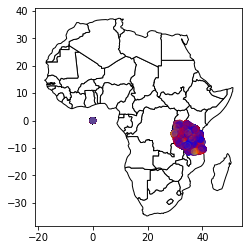

In [101]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.

gdf.plot(ax=ax, color=df['color'], alpha = .1)
plt.show()

In [100]:
fig, ax1 = plt.subplots(1, 1, figsize=(20,20))
    ax1.plot(ax=gax, color=df['color'], alpha = .1)

IndentationError: unexpected indent (<ipython-input-100-aae0a909204d>, line 2)